In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
df21 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

Text(0.5, 1.0, 'Happiness Score')

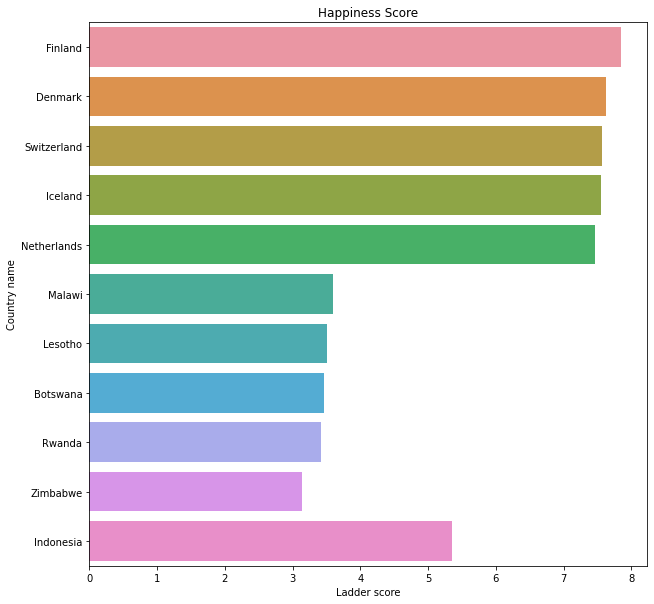

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x = "Ladder score", y = "Country name", data=df21.iloc[0:5].append(df21.iloc[-6:-1].append(df21[df21["Country name"] == "Indonesia"])) )
plt.title("Happiness Score")

In [4]:
countries = df21["Country name"].unique()

In [5]:
pivot = pd.pivot_table(df, index="Country name", columns = 'year', values = "Life Ladder")

In [6]:
pivot

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country name,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN


In [7]:
temp = df21[["Country name", "Ladder score"]].set_index("Country name")
temp = temp["Ladder score"].rename(2021)
temp

Country name
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
               ...  
Lesotho        3.512
Botswana       3.467
Rwanda         3.415
Zimbabwe       3.145
Afghanistan    2.523
Name: 2021, Length: 149, dtype: float64

In [8]:
pivot = pivot.join(temp)

In [9]:
pt = pivot.transpose()

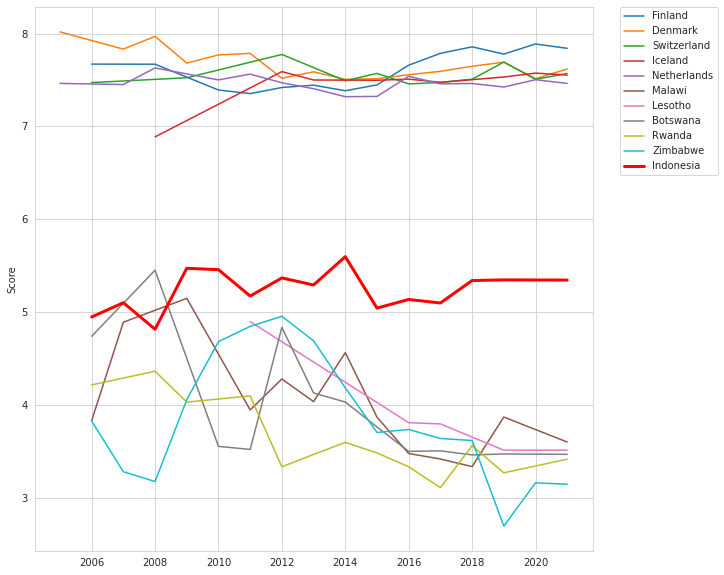

In [10]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(10,10))
# plt.figure(figsize=(10,10))
axes.set_ylabel("Score")
for country in countries[0:5]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)
    
for country in countries[-6:-1]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)

sns.lineplot(ax = axes, x = pt["Indonesia"].index, y = "Indonesia", data=pt, label="Indonesia", linewidth = 3, color="red")
# for country in countries[-6:-1]:
#     sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == country], label=country)
# sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == "Indonesia"], label="Indonesia", linewidth = 3, color="red")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
generosity = df21.sort_values("Generosity",ascending = False)

Text(0.5, 1.0, 'Generosity')

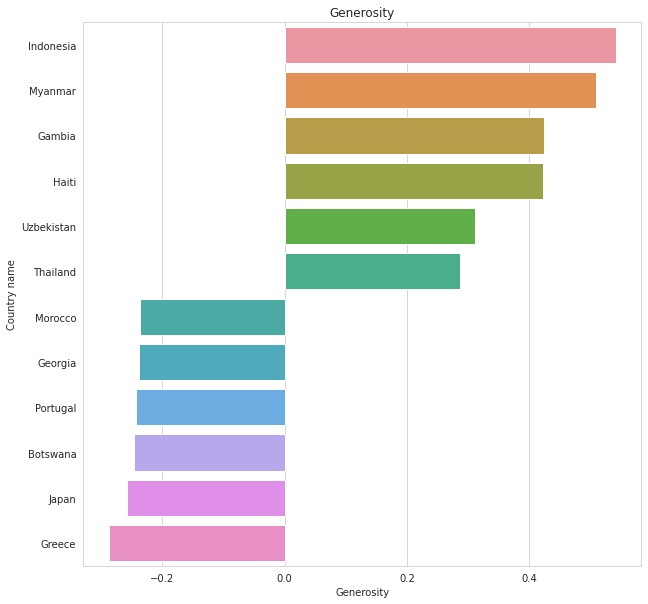

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x="Generosity", y="Country name", data = generosity.iloc[0:6].append(generosity.iloc[-6:]))
plt.title("Generosity")

In [13]:
gdp = df21.sort_values("Logged GDP per capita",ascending = False)
gdp

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,0.106,4.833,4.417,7.288,0.720,56.498,0.735,0.050,0.850,2.43,0.228,0.580,0.253,0.430,0.221,0.057,2.857
114,Mozambique,Sub-Saharan Africa,4.794,0.103,4.997,4.592,7.158,0.744,54.706,0.882,0.061,0.684,2.43,0.183,0.634,0.196,0.608,0.228,0.163,2.783
95,Niger,Sub-Saharan Africa,5.074,0.102,5.273,4.875,7.098,0.641,53.780,0.806,0.018,0.693,2.43,0.162,0.402,0.167,0.516,0.200,0.157,3.470
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190


Text(0.5, 1.0, 'Indonesia GDP vs Other Countries')

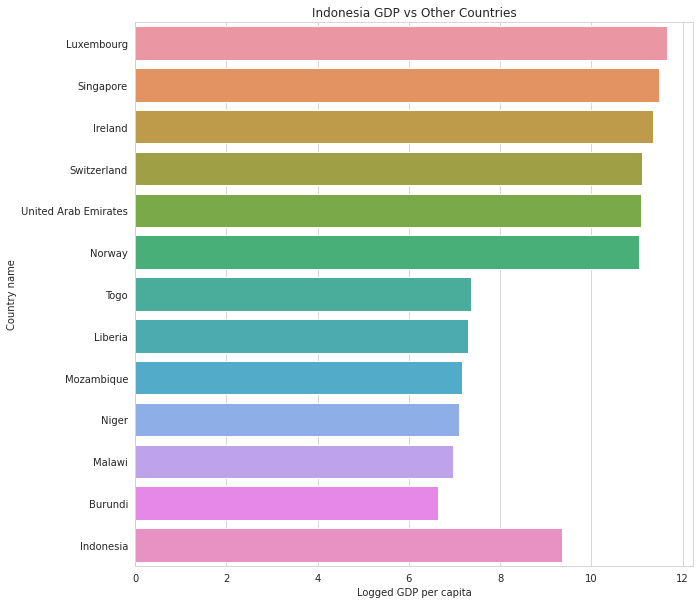

In [14]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Logged GDP per capita", y="Country name", data = gdp.iloc[0:6].append(gdp.iloc[-6:]).append(gdp[gdp["Country name"] == "Indonesia"]))
plt.title("Indonesia GDP vs Other Countries")

In [15]:
freedom = df21.sort_values("Freedom to make life choices",ascending = False)
freedom.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


Text(0.5, 1.0, 'Freedom to make life choices')

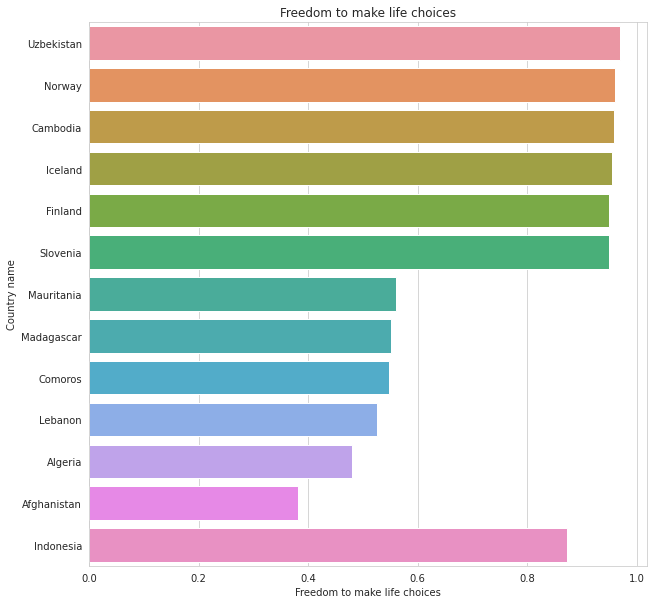

In [16]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Freedom to make life choices", y="Country name", data = freedom.iloc[0:6].append(freedom.iloc[-6:]).append(freedom[freedom["Country name"] == "Indonesia"]))
plt.title("Freedom to make life choices")

In [17]:
social = df21.sort_values("Social support",ascending = False)
social.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


Text(0.5, 1.0, 'Social support')

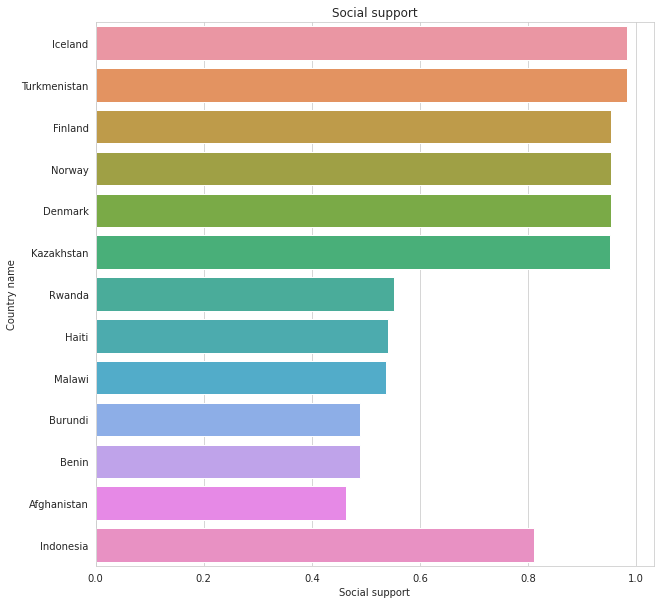

In [18]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Social support", y="Country name", data = social.iloc[0:6].append(social.iloc[-6:]).append(social[social["Country name"] == "Indonesia"]))
plt.title("Social support")

In [19]:
life = df21.sort_values("Healthy life expectancy",ascending = False)
life.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


Text(0.5, 1.0, 'Healthy life expectancy')

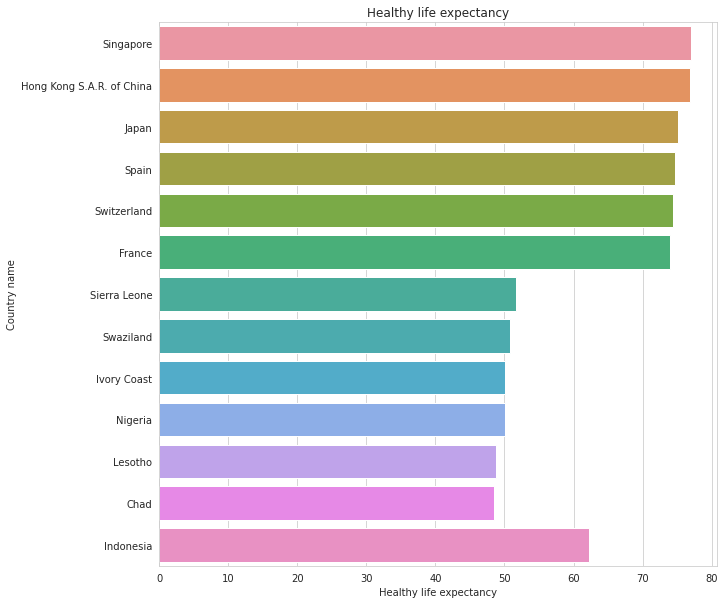

In [20]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Healthy life expectancy", y="Country name", data = life.iloc[0:6].append(life.iloc[-6:]).append(life[life["Country name"] == "Indonesia"]))
plt.title("Healthy life expectancy")

In [21]:
corruption = df21.sort_values("Perceptions of corruption",ascending = False)
corruption[21:30]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
52,Hungary,Central and Eastern Europe,5.992,0.047,6.085,5.899,10.358,0.943,68.000,0.755,-0.186,0.876,2.43,1.301,1.083,0.615,0.454,0.067,0.040,2.432
110,Iraq,Middle East and North Africa,4.854,0.059,4.970,4.738,9.240,0.746,60.583,0.630,-0.053,0.875,2.43,0.910,0.638,0.381,0.302,0.153,0.041,2.429
121,Tunisia,Middle East and North Africa,4.596,0.058,4.709,4.484,9.266,0.691,67.201,0.656,-0.201,0.870,2.43,0.919,0.515,0.590,0.334,0.057,0.044,2.138
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
137,Sierra Leone,Sub-Saharan Africa,3.849,0.077,4.001,3.698,7.434,0.630,51.651,0.717,0.084,0.866,2.43,0.279,0.377,0.100,0.408,0.243,0.047,2.396
27,Italy,Western Europe,6.483,0.045,6.572,6.395,10.623,0.880,73.800,0.693,-0.084,0.866,2.43,1.393,0.940,0.798,0.379,0.133,0.047,2.794
128,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,0.079,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075
102,South Africa,Sub-Saharan Africa,4.956,0.060,5.074,4.839,9.403,0.860,56.904,0.749,-0.067,0.860,2.43,0.967,0.895,0.265,0.447,0.144,0.051,2.187


Text(0.5, 1.0, 'Perceptions of corruption')

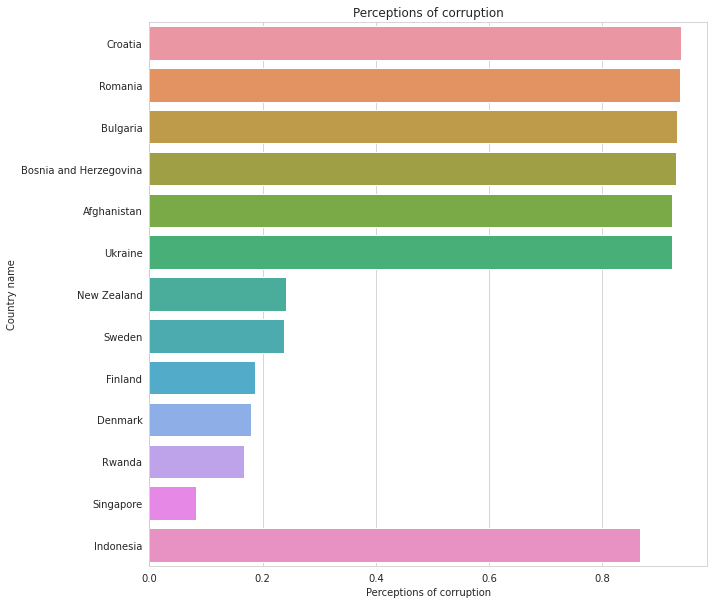

In [22]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Perceptions of corruption", y="Country name", data = corruption.iloc[0:6].append(corruption.iloc[-6:]).append(corruption[corruption["Country name"] == "Indonesia"]))
plt.title("Perceptions of corruption")

In [23]:
sea = df21[df21["Regional indicator"] == "Southeast Asia"]
sea

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
53,Thailand,Southeast Asia,5.985,0.047,6.077,5.893,9.805,0.888,67.401,0.884,0.287,0.895,2.43,1.107,0.957,0.596,0.611,0.375,0.028,2.309
60,Philippines,Southeast Asia,5.880,0.052,5.982,5.778,9.076,0.830,62.000,0.917,-0.097,0.742,2.43,0.853,0.828,0.426,0.651,0.125,0.126,2.872
78,Vietnam,Southeast Asia,5.411,0.039,5.488,5.334,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
80,Malaysia,Southeast Asia,5.384,0.049,5.480,5.289,10.238,0.817,67.102,0.895,0.125,0.839,2.43,1.259,0.797,0.587,0.624,0.270,0.064,1.784
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
99,Laos,Southeast Asia,5.030,0.045,5.119,4.941,8.947,0.728,58.968,0.910,0.123,0.658,2.43,0.808,0.598,0.330,0.643,0.268,0.179,2.204
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
125,Myanmar,Southeast Asia,4.426,0.052,4.527,4.324,8.541,0.779,59.302,0.876,0.509,0.660,2.43,0.666,0.713,0.341,0.601,0.520,0.178,1.407


Text(0.5, 1.0, 'Southeast Asia Happiness Report')

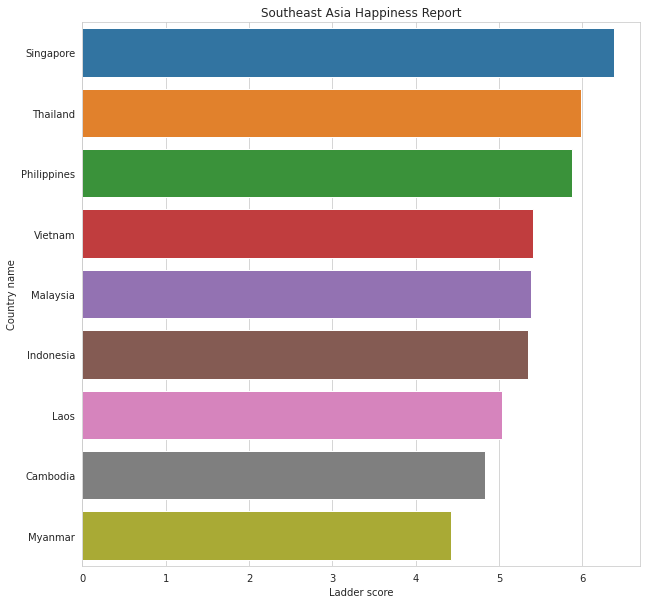

In [24]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Ladder score", y="Country name", data = sea)
plt.title("Southeast Asia Happiness Report")

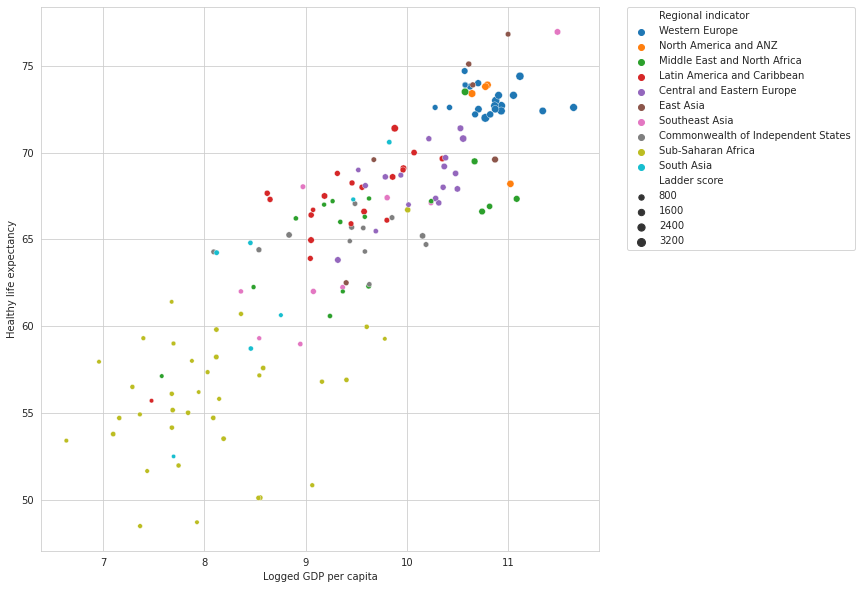

In [25]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = "Logged GDP per capita", y = "Healthy life expectancy", hue = "Regional indicator", size = df21["Ladder score"]**4, data=df21)
# sns.scatterplot(x = "Logged GDP per capita", y = "Healthy life expectancy", data=df21[df21["Country name"] == "Indonesia"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
dftemp = pd.DataFrame()
dftemp["Country name"] = countries

In [27]:
dftemp

,Country name
0,Finland
1,Denmark
2,Switzerland
3,Iceland
4,Netherlands
...,...
144,Lesotho
145,Botswana
146,Rwanda
147,Zimbabwe


In [28]:
min_values = np.array([])
for name in countries:
    min_values = np.append(min_values, df[df["Country name"] == name].iloc[0]["Life Ladder"])
    
min_values

array([7.672, 8.019, 7.473, 6.888, 7.464, 7.416, 7.376, 6.958, 7.305,
       7.122, 7.341, 7.173, 6.62 , 7.418, 7.144, 7.082, 6.984, 6.439,
       7.182, 7.262, 7.093, 5.701, 6.328, 6.189, 6.734, 7.08 , 7.153,
       6.854, 5.811, 5.901, 5.786, 6.463, 5.104, 5.265, 6.637, 6.581,
       6.208, 5.954, 6.238, 5.371, 6.128, 5.232, 6.063, 5.587, 5.476,
       5.049, 6.076, 4.75 , 5.701, 5.477, 4.71 , 6.025, 5.194, 5.885,
       4.46 , 6.516, 6.313, 5.405, 5.397, 5.821, 4.67 , 5.332, 4.811,
       4.9  , 5.102, 5.024, 4.641, 6.006, 5.374, 4.609, 4.73 , 5.196,
       5.088, 5.463, 5.658, 4.964, 5.511, 4.613, 5.294, 5.754, 6.012,
       4.947, 3.82 , 4.56 , 4.197, 4.289, 4.567, 3.844, 5.198, 4.728,
       3.851, 4.417, 4.634, 4.494, 4.535, 3.737, 6.568, 4.118, 3.33 ,
       5.076, 4.319, 4.045, 5.084, 4.719, 5.225, 4.383, 7.17 , 3.675,
       5.464, 4.804, 4.59 , 4.255, 3.801, 3.569, 4.595, 4.71 , 4.014,
       5.308, 3.734, 3.701, 4.223, 5.025, 5.491, 4.886, 4.716, 4.439,
       6.295, 3.435,

In [29]:
dftemp["min_val"] = min_values
dftemp["val_2021"] = df21["Ladder score"]
dftemp["growth"] = dftemp["val_2021"] - dftemp["min_val"]
dftemp = dftemp.sort_values("growth")

Text(0.5, 1.0, 'Happiness Growth')

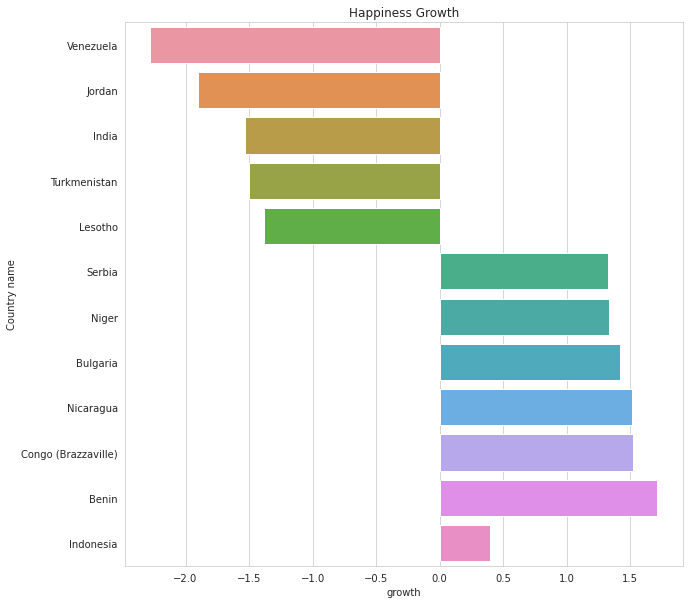

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x = "growth", y="Country name", data = dftemp.iloc[0:5].append(dftemp.iloc[-6:].append(dftemp[dftemp["Country name"] == "Indonesia"])))
plt.title("Happiness Growth")

In [31]:
top20 = df21[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].iloc[0:20]
bot20 = df21[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].iloc[-20:]
ina = df21[df21["Country name"] == "Indonesia"][["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
ina

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,5.345,9.365,0.811,62.236,0.873,0.542,0.867


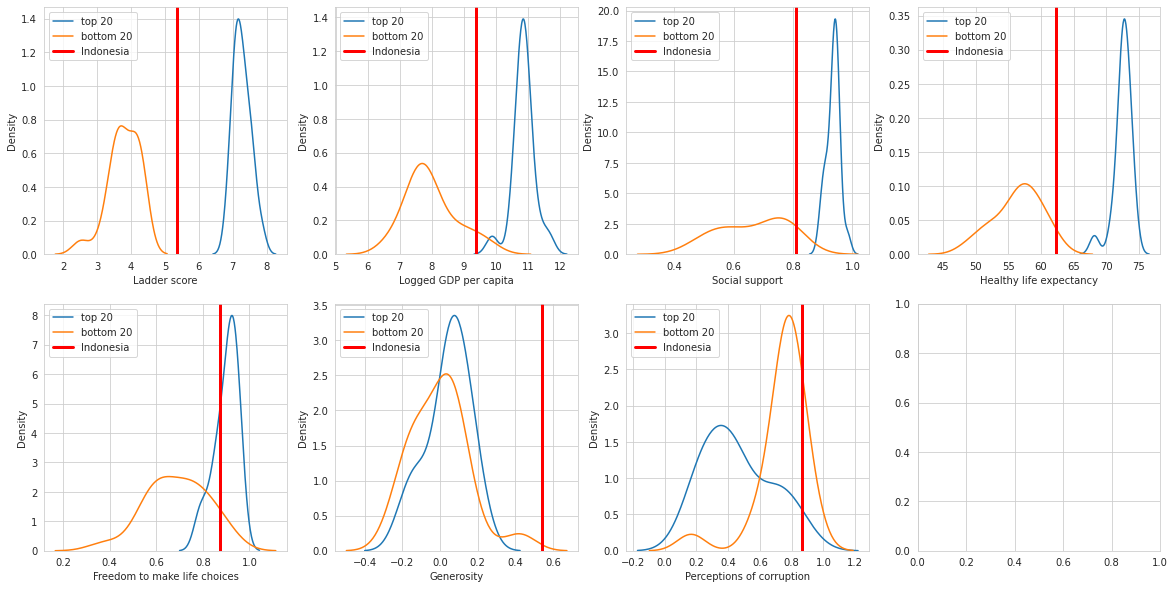

In [62]:
fig, axes = plt.subplots(2,4, figsize=(20,10))
a = 0
b = 0
for col in top20.columns:
    sns.kdeplot(x = top20[col], ax=axes[a][b], label = "top 20")
    sns.kdeplot(x = bot20[col], ax=axes[a][b], label = "bottom 20")
    axes[a][b].axvline(ina[col].values[0], c='r', label="Indonesia", linewidth=3)
    axes[a][b].legend()
    b+=1
    if(b > 3):
        a+=1
        b = 0